In [8]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# An object representing the "frozen" analytical distribution
# Defaults to the standard normal distribution, N~(0, 1)
dist = stats.norm()

# Draw random samples from the population you built above.
# This is just a sample, so the mean and std. deviation should
# be close to (1, 0).
sample = dist.rvs(size=1000) 
print(sample)

[-1.24950577e+00  1.07715396e+00  1.09270977e+00 -2.68437912e-01
 -6.22091195e-01 -1.29197827e-01 -5.40802661e-01 -2.78683934e-01
 -4.25536549e-01 -7.95262900e-01 -1.88392414e+00 -1.91387523e+00
  3.83084384e-01  2.82538953e-01 -7.57097218e-01  1.70304170e+00
 -7.63249496e-01 -4.96410333e-02 -4.23339137e-01  3.60192213e-01
  2.82719888e-01 -1.87510323e-01  2.00725056e-01  7.53319290e-01
 -8.37212037e-02  6.21993799e-01  4.91068277e-01 -9.25689418e-01
 -5.92787101e-01 -6.16043878e-01 -1.46389714e+00 -1.93741103e+00
 -6.08992659e-01  6.13520269e-01  4.62911339e-01  9.40256541e-01
  1.14137693e+00  2.08699799e-01 -1.47977543e+00 -6.74835937e-01
 -3.06614037e-01  7.50774540e-01  1.47363321e-01 -2.33667761e-01
 -6.93278156e-01 -7.81223203e-01 -9.20341384e-01  3.92180383e-01
 -5.38470539e-01 -3.14013313e-01 -4.46155908e-01  1.92253222e+00
 -1.03313604e+00 -1.27008545e+00  3.08974387e-02 -2.04650422e+00
  1.25613772e+00  1.28054117e+00  9.66950187e-01 -3.38877820e-01
 -6.54884979e-01  2.98134

In [10]:
# `ppf()`: percent point function (inverse of cdf — percentiles).
print(stats.norm.ppf(0.01)) # -2.3263478740408408
print(stats.norm.ppf(0.99)) # 2.3263478740408408
x = np.linspace(start=stats.norm.ppf(0.01),
                stop=stats.norm.ppf(0.99), num=250)
print(x)

-2.3263478740408408
2.3263478740408408
[-2.32634787 -2.30766235 -2.28897682 -2.2702913  -2.25160577 -2.23292025
 -2.21423472 -2.1955492  -2.17686367 -2.15817815 -2.13949262 -2.1208071
 -2.10212157 -2.08343605 -2.06475052 -2.046065   -2.02737947 -2.00869395
 -1.99000842 -1.9713229  -1.95263737 -1.93395185 -1.91526632 -1.8965808
 -1.87789527 -1.85920975 -1.84052422 -1.8218387  -1.80315317 -1.78446765
 -1.76578212 -1.7470966  -1.72841107 -1.70972555 -1.69104002 -1.6723545
 -1.65366897 -1.63498345 -1.61629792 -1.5976124  -1.57892687 -1.56024135
 -1.54155582 -1.5228703  -1.50418477 -1.48549924 -1.46681372 -1.44812819
 -1.42944267 -1.41075714 -1.39207162 -1.37338609 -1.35470057 -1.33601504
 -1.31732952 -1.29864399 -1.27995847 -1.26127294 -1.24258742 -1.22390189
 -1.20521637 -1.18653084 -1.16784532 -1.14915979 -1.13047427 -1.11178874
 -1.09310322 -1.07441769 -1.05573217 -1.03704664 -1.01836112 -0.99967559
 -0.98099007 -0.96230454 -0.94361902 -0.92493349 -0.90624797 -0.88756244
 -0.86887692 -0

In [13]:
gkde = stats.gaussian_kde(dataset=sample) # Gaussian kernel density estimate, nonparametric statistics

Text(-2.0, 0.35, '$f(x) = \\frac{\\exp(-x^2/2)}{\\sqrt{2*\\pi}}$')

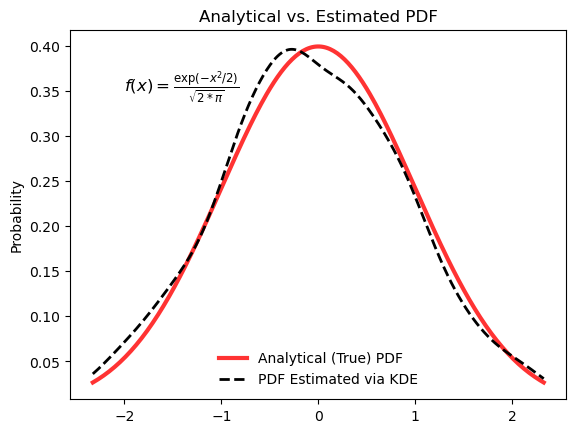

In [12]:
# `gkde.evaluate()` estimates the PDF itself.
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle='solid', c='red', lw=3,
        alpha=0.8, label='Analytical (True) PDF') # True PDF
ax.plot(x, gkde.evaluate(x), linestyle='dashed', c='black', lw=2,
        label='PDF Estimated via KDE') # Estimated PDF
ax.legend(loc='best', frameon=False)
ax.set_title('Analytical vs. Estimated PDF')
ax.set_ylabel('Probability')
ax.text(-2., 0.35, r'$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$',
        fontsize=12)